In [24]:
from typing import TypedDict

class State(TypedDict):
    graph_info: str

In [25]:
def start_play(state: State):
    print("start play node has been called")
    return {"graph_info": state["graph_info"] + " Im planning to play."}

def cricket(state: State):
    print("crickey node has been called")
    return {"graph_info": state["graph_info"] + " Cricket"}

def batminton(state: State):
    print("batminton node has been called")
    return {"graph_info": state["graph_info"] + " Batminton"}

In [26]:

## condition

import random

from typing import Literal

def random_play(state: State) -> Literal["cricket", "batminton"]:
    graph_info = state["graph_info"]
    if random.random() < 0.5:
        return "cricket"
    else:
        return "batminton"

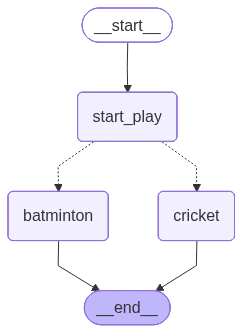

In [27]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END


## building the graph

graph = StateGraph(State)

## adding nodes
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("batminton", batminton)

## schedule flow of the graph
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("batminton", END)


## compiling the graph

graph_builder = graph.compile()


## visualizing the graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [28]:
## graph invocation



graph_builder.invoke({"graph_info": "my name is krish"})

start play node has been called
batminton node has been called


{'graph_info': 'my name is krish Im planning to play. Batminton'}